In [99]:
import json
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Language Impact

In [100]:
# Import the JSON file with the results log and open it as dataframe
with open("Language-comparison-128-seq-length.json") as f:
    content = json.load(f)

content[0]

{'Run': 'XMLRobertaBase_run_0',
 'microF1': 0.47715736040609136,
 'macroF1': 0.4097697898403753,
 'y_true': ['News/Reporting',
  'Opinionated News',
  'Invitation',
  'Other',
  'Research Article',
  'News/Reporting',
  'Opinion/Argumentation',
  'Opinionated News',
  'Opinion/Argumentation',
  'Opinionated News',
  'Forum',
  'Opinionated News',
  'Correspondence',
  'Correspondence',
  'Information/Explanation',
  'Correspondence',
  'Opinionated News',
  'Promotion',
  'Information/Explanation',
  'Information/Explanation',
  'Invitation',
  'Opinion/Argumentation',
  'News/Reporting',
  'Invitation',
  'Information/Explanation',
  'News/Reporting',
  'News/Reporting',
  'Information/Explanation',
  'News/Reporting',
  'Opinionated News',
  'Instruction',
  'Information/Explanation',
  'Information/Explanation',
  'News/Reporting',
  'Promotion of a Product',
  'Invitation',
  'News/Reporting',
  'Information/Explanation',
  'Instruction',
  'Information/Explanation',
  'Instruction

In [101]:
jsonlikecontent = dict()

for key in content[0].keys():
jsonlikecontent[key] = [i[key] for i in content]

results_df = pd.DataFrame(data = jsonlikecontent)

results_df.head()

IndentationError: expected an indented block (<ipython-input-101-49e0cd901765>, line 4)

In [107]:
results_df.columns

Index(['Run', 'microF1', 'macroF1', 'y_true', 'y_pred', 'run', 'model'], dtype='object')

In [108]:
results_df.model.unique()

array(['XMLRobertaBase', 'CroSloEngualBERT', 'SloBERTa', 'BERTic', 'BERT'],
      dtype=object)

### Creating a table with mean and std over 5 runs

In [ ]:
def calculate_mean_std(model_name, df):
'''
This function takes the model_name from the "model column" in the dataframe with results log and prints out the mean and std overall all of the runs of the model.

Args:
    model_name (str): the name of the model as stated in the df.model column.
    df (dataframe): the name of the dataframe with results

    Returns: A dictionary with the model name, F1 macro and micro means and stds.
    '''
    group_per_model_results = df.groupby("model")
    model_results = group_per_model_results.get_group(model_name)

    # Calculate the mean and std of micro and macro F1 scores
    micro_f1 = model_results.microF1.values
    macro_f1 = model_results.macroF1.values

    print(f"{model_name}, micro F1: {micro_f1}, macro F1: {macro_f1}")

    fmi_mean = micro_f1.mean()
    fmi_std = micro_f1.std()

    fma_mean = macro_f1.mean()
    fma_std = macro_f1.std()

    print(f"{model_name} & {fmi_mean:0.3} $\pm$ {fmi_std:0.1} & {fma_mean:0.3} $\pm$ {fma_std:0.1}\\")
    
    results = {"Model":model_name, "Micro F1": f"{fmi_mean:0.3}", "Micro STD": f"{fmi_std:0.2}","Macro F1": f"{fma_mean:0.3}", "Macro STD": f"{fma_std:0.2}"}
    return results 

In [ ]:
print("""
Model & Micro F1 & Macro F1\\""")
calculate_mean_std("CroSloEngualBERT",results_df)


Model & Micro F1 & Macro F1\
CroSloEngualBERT, micro F1: [0.49746193 0.51269036 0.51269036 0.5177665  0.5177665 ], macro F1: [0.38927796 0.42628433 0.44135241 0.44523173 0.44103156]
CroSloEngualBERT & 0.512 $\pm$ 0.007 & 0.429 $\pm$ 0.02\


{'Model': 'CroSloEngualBERT',
 'Micro F1': '0.512',
 'Micro STD': '0.0075',
 'Macro F1': '0.429',
 'Macro STD': '0.021'}

In [ ]:
print("""
Model & Micro F1 & Macro F1\\""")

mean_results_list = []

for i in results_df.model.unique().tolist():
    mean_results_list.append(calculate_mean_std(i,results_df))


Model & Micro F1 & Macro F1\
XMLRobertaBase, micro F1: [0.47715736 0.51269036 0.50253807 0.49746193 0.44162437], macro F1: [0.40976979 0.43758628 0.45818993 0.44774551 0.39303668]
XMLRobertaBase & 0.486 $\pm$ 0.03 & 0.429 $\pm$ 0.02\
CroSloEngualBERT, micro F1: [0.49746193 0.51269036 0.51269036 0.5177665  0.5177665 ], macro F1: [0.38927796 0.42628433 0.44135241 0.44523173 0.44103156]
CroSloEngualBERT & 0.512 $\pm$ 0.007 & 0.429 $\pm$ 0.02\
SloBERTa, micro F1: [0.55329949 0.57360406 0.57360406 0.58375635 0.56345178], macro F1: [0.48028509 0.50577455 0.57301745 0.56505448 0.5163433 ]
SloBERTa & 0.57 $\pm$ 0.01 & 0.528 $\pm$ 0.04\
BERTic, micro F1: [0.46700508 0.46192893 0.49746193 0.47208122 0.46192893], macro F1: [0.37847611 0.39123323 0.39921692 0.39336758 0.37393622]
BERTic & 0.472 $\pm$ 0.01 & 0.387 $\pm$ 0.009\
BERT, micro F1: [0.28426396 0.24873096 0.24873096 0.23857868 0.25888325], macro F1: [0.20045322 0.18210617 0.19254391 0.22022622 0.21913016]
BERT & 0.256 $\pm$ 0.02 & 0.203 

In [ ]:
mean_results_list

[{'Model': 'XMLRobertaBase',
  'Micro F1': '0.486',
  'Micro STD': '0.025',
  'Macro F1': '0.429',
  'Macro STD': '0.024'},
 {'Model': 'CroSloEngualBERT',
  'Micro F1': '0.512',
  'Micro STD': '0.0075',
  'Macro F1': '0.429',
  'Macro STD': '0.021'},
 {'Model': 'SloBERTa',
  'Micro F1': '0.57',
  'Micro STD': '0.01',
  'Macro F1': '0.528',
  'Macro STD': '0.036'},
 {'Model': 'BERTic',
  'Micro F1': '0.472',
  'Micro STD': '0.013',
  'Macro F1': '0.387',
  'Macro STD': '0.0095'},
 {'Model': 'BERT',
  'Micro F1': '0.256',
  'Micro STD': '0.016',
  'Macro F1': '0.203',
  'Macro STD': '0.015'}]

### Calculating the statistical significance

Calculating statistical significance for the model's performance. If p < 0.05, there is statistical significance.

In this setup, we are assuming that c1 is better than c2 and we're observing macro F1 and micro F1.

In [ ]:
def stat_signif(first_model, second_model, dataframe):
    '''
    This function calculates the statistical significance, assuming that the performance of the first model is statistically significantly different than the performance of the second. If p value is less than 0.05, the difference is statistically significant.

    The dataframe used should have columns named: 'model' (with model name), 'microF1' and 'macroF1'.

    Args:
        first_model (str): name of the first model (string from the results_df.model column)
        second model (str): name of the second model (string from the results_df.model column)
        dataframe (dataframe object): name of the dataframe with the results
    '''
    c1 = dataframe.model == first_model
    c2 = dataframe.model == second_model

    #Candidate:
    highermi = dataframe.loc[c1, "microF1"][0:5]
    higherma = dataframe.loc[c1, "macroF1"][0:5]
    #Alternative
    lowermi = dataframe.loc[c2, "microF1"][0:5]
    lowerma = dataframe.loc[c2, "macroF1"][0:5]

    print("Shape of the micro and macro scores for model 1: ",highermi.shape,higherma.shape)
    print("Shape of the micro and macro scores for model 2: ", lowermi.shape, lowerma.shape)

    p_mi = stats.mannwhitneyu(highermi,lowermi, alternative='greater')[1]
    p_ma = stats.mannwhitneyu(higherma,lowerma, alternative='greater')[1]

    print(f"MannWhithey p value for micro F1: {stats.mannwhitneyu(highermi,lowermi, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")

    if p_mi < 0.05:
        print("Micros are statistically significantly different.")
    else:
        print("There is no statistical significance in micro F1 results.")

    print(f"MannWhithey p value for macro F1: {stats.mannwhitneyu(higherma,lowerma, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")

    if p_ma < 0.05:
        print("Macros are statistically significantly different.")
    else:
        print("There is no statistical significance in macro F1 results.")

    #print(f"Student p value: {stats.ttest_ind(higher,lower)[1]:0.3}", "\t\t(null hypothesis: samples have identical average, equal variance is assumed but not necessary)")

    print(f"Micro F1: Higher average: {np.mean(highermi):0.4}, lower average: {np.mean(lowermi):0.4}")

    print(f"Macro F1: Higher average: {np.mean(higherma):0.4}, lower average: {np.mean(lowerma):0.4}")



In [ ]:
results_df.model.unique()

array(['XMLRobertaBase', 'CroSloEngualBERT', 'SloBERTa', 'BERTic', 'BERT'],
      dtype=object)

In [ ]:
stat_signif("SloBERTa","XMLRobertaBase",results_df)

Shape of the micro and macro scores for model 1:  (5,) (5,)
Shape of the micro and macro scores for model 2:  (5,) (5,)
MannWhithey p value for micro F1: 0.00596 		(alternative hypothesis: first is greater than the second)
Micros are statistically significantly different.
MannWhithey p value for macro F1: 0.00609 		(alternative hypothesis: first is greater than the second)
Macros are statistically significantly different.
Micro F1: Higher average: 0.5695, lower average: 0.4863
Macro F1: Higher average: 0.5281, lower average: 0.4293


In [ ]:
stat_signif("SloBERTa","CroSloEngualBERT",results_df)

Shape of the micro and macro scores for model 1:  (5,) (5,)
Shape of the micro and macro scores for model 2:  (5,) (5,)
MannWhithey p value for micro F1: 0.00571 		(alternative hypothesis: first is greater than the second)
Micros are statistically significantly different.
MannWhithey p value for macro F1: 0.00609 		(alternative hypothesis: first is greater than the second)
Macros are statistically significantly different.
Micro F1: Higher average: 0.5695, lower average: 0.5117
Macro F1: Higher average: 0.5281, lower average: 0.4286


In [ ]:
stat_signif("XMLRobertaBase","CroSloEngualBERT",results_df)

Shape of the micro and macro scores for model 1:  (5,) (5,)
Shape of the micro and macro scores for model 2:  (5,) (5,)
MannWhithey p value for micro F1: 0.978 		(alternative hypothesis: first is greater than the second)
There is no statistical significance in micro F1 results.
MannWhithey p value for macro F1: 0.417 		(alternative hypothesis: first is greater than the second)
There is no statistical significance in macro F1 results.
Micro F1: Higher average: 0.4863, lower average: 0.5117
Macro F1: Higher average: 0.4293, lower average: 0.4286


In [ ]:
stat_signif("XMLRobertaBase","BERTic",results_df)

Shape of the micro and macro scores for model 1:  (5,) (5,)
Shape of the micro and macro scores for model 2:  (5,) (5,)
MannWhithey p value for micro F1: 0.124 		(alternative hypothesis: first is greater than the second)
There is no statistical significance in micro F1 results.
MannWhithey p value for macro F1: 0.0184 		(alternative hypothesis: first is greater than the second)
Macros are statistically significantly different.
Micro F1: Higher average: 0.4863, lower average: 0.4721
Macro F1: Higher average: 0.4293, lower average: 0.3872


In [ ]:
stat_signif("CroSloEngualBERT","BERTic",results_df)

Shape of the micro and macro scores for model 1:  (5,) (5,)
Shape of the micro and macro scores for model 2:  (5,) (5,)
MannWhithey p value for micro F1: 0.00751 		(alternative hypothesis: first is greater than the second)
Micros are statistically significantly different.
MannWhithey p value for macro F1: 0.0301 		(alternative hypothesis: first is greater than the second)
Macros are statistically significantly different.
Micro F1: Higher average: 0.5117, lower average: 0.4721
Macro F1: Higher average: 0.4286, lower average: 0.3872


### Scatterplot for size and performance dependance

In [ ]:
print(mean_results_list)

[{'Model': 'XMLRobertaBase', 'Micro F1': '0.486', 'Micro STD': '0.025', 'Macro F1': '0.429', 'Macro STD': '0.024'}, {'Model': 'CroSloEngualBERT', 'Micro F1': '0.512', 'Micro STD': '0.0075', 'Macro F1': '0.429', 'Macro STD': '0.021'}, {'Model': 'SloBERTa', 'Micro F1': '0.57', 'Micro STD': '0.01', 'Macro F1': '0.528', 'Macro STD': '0.036'}, {'Model': 'BERTic', 'Micro F1': '0.472', 'Micro STD': '0.013', 'Macro F1': '0.387', 'Macro STD': '0.0095'}, {'Model': 'BERT', 'Micro F1': '0.256', 'Micro STD': '0.016', 'Macro F1': '0.203', 'Macro STD': '0.015'}]


In [ ]:
results_reordered = [{'Model': 'SloBERTa', 'Micro F1': '0.57', 'Micro STD': '0.01', 'Macro F1': '0.528', 'Macro STD': '0.036'}, {'Model': 'XML-RoBERTa (base)', 'Micro F1': '0.486', 'Micro STD': '0.025', 'Macro F1': '0.429', 'Macro STD': '0.024'}, {'Model': 'CroSloEngual BERT', 'Micro F1': '0.512', 'Micro STD': '0.0075', 'Macro F1': '0.429', 'Macro STD': '0.021'}, {'Model': 'BERTić', 'Micro F1': '0.472', 'Micro STD': '0.013', 'Macro F1': '0.387', 'Macro STD': '0.0095'}, {'Model': 'BERT', 'Micro F1': '0.256', 'Micro STD': '0.016', 'Macro F1': '0.203', 'Macro STD': '0.015'}]

In [ ]:
micro_means = []
macro_means = []
micro_stds = []
macro_stds = []

model_name = []

for i in results_reordered:
    micro_means.append(i["Micro F1"])
    macro_means.append(i["Macro F1"])
    micro_stds.append(i["Micro STD"])
    macro_stds.append(i['Macro STD'])
    model_name.append(i["Model"])

print(micro_means, macro_means, micro_stds, macro_stds, model_name)

['0.57', '0.486', '0.512', '0.472', '0.256'] ['0.528', '0.429', '0.429', '0.387', '0.203'] ['0.01', '0.025', '0.0075', '0.013', '0.016'] ['0.036', '0.024', '0.021', '0.0095', '0.015'] ['SloBERTa', 'XML-RoBERTa (base)', 'CroSloEngual BERT', 'BERTić', 'BERT']


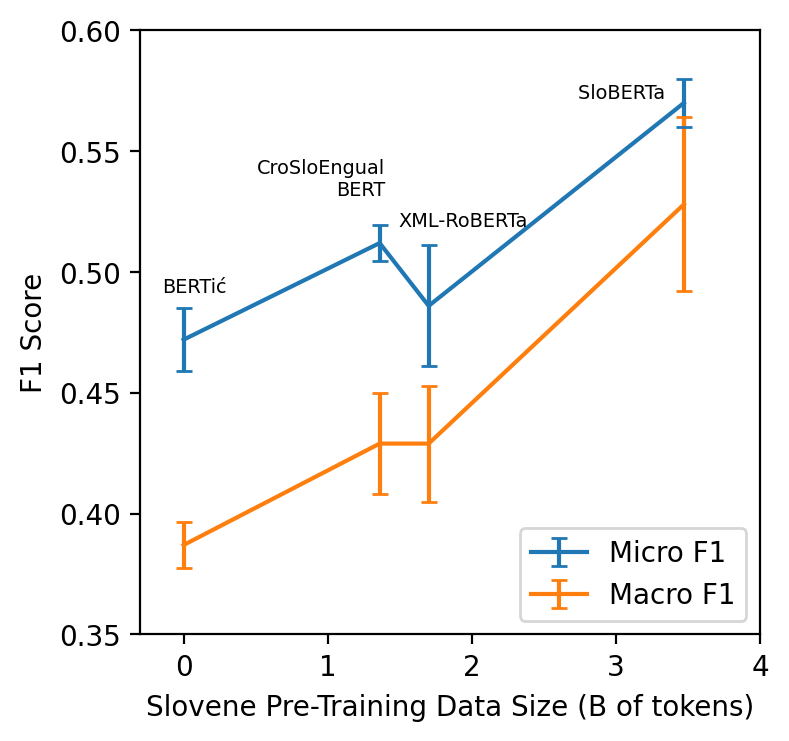

In [112]:
size_tokens = [3.47, 1.7, 1.36, 0.0, 0.0]

fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.errorbar([3.47, 1.7, 1.36, 0.0], [0.57, 0.486, 0.512, 0.472], yerr=[0.01, 0.025, 0.0075, 0.013], label="Micro F1", capsize=3)
ax.errorbar([3.47, 1.7, 1.36, 0.0], [0.528, 0.429, 0.429, 0.387], yerr=[0.036, 0.024, 0.021, 0.0095], label="Macro F1", capsize=3)
plt.axis([-0.3,4,0.35,0.6])
ax.set_xlabel('Slovene Pre-Training Data Size (B of tokens)')
ax.set_ylabel('F1 Score')
ax.annotate(f'SloBERTa   ', (3.47,0.57), ha='right', va='bottom', fontsize='x-small')
ax.annotate(f'XML-RoBERTa\n\n\n', (1.49,0.49), ha='left', va='bottom', fontsize='x-small')
ax.annotate(f'CroSloEngual\nBERT', (1.4,0.53), ha='right', va='bottom', fontsize='x-small')
ax.annotate(f'BERTić', (0.3,0.49), ha='right', va='bottom', fontsize='x-small')
ax.legend(loc="lower right")
#ax.set_xlabel("Impact of the Size of the Slovene Pre-Training Data on the Micro and Macro F1")
plt.savefig("C:/Users/kuzma/Google Drive/GitHub/task5_webgenres/plots/language_impact_scatterplot.png")
plt.show()



### Plotting confusion matrices over all 5 runs

In [ ]:
LABELS = ['Information/Explanation','Research Article','Instruction','Recipe', 'Legal/Regulation','Call','Announcement','News/Reporting','Opinionated News','Opinion/Argumentation','Review','Promotion','Promotion of a Product','Promotion of Services','Invitation','Forum','Interview','Correspondence','Prose','List of Summaries/Excerpts','Other']

len(LABELS)

21

In [ ]:
# Get the y_true and y_pred labels for all 5 runs:

def cm_over_5_runs(model_name):
    '''
    Takes the names of the model and the json file named "content" and prints out the confusion matrix for the model over all five runs.

    Args:
    model_name (str): the name of the model
    '''
    y_pred_all = []
    y_true_all = []


    for element in content:
        if element["model"] == model_name:
            for i in element["y_true"]:
                y_true_all.append(i)
            for i2 in element["y_pred"]:
                y_pred_all.append(i2)

    print(f"Number of all true labels: {len(y_true_all)}, Number of all predicted labels: {len(y_pred_all)}")

    cm = confusion_matrix(y_true_all, y_pred_all, labels=LABELS)
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, cmap="Oranges")
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
    classNames = LABELS
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames)

    fig1 = plt.gcf()
    #plt.title(f"Confusion Matrix for {model_name} over 5 Runs")
    image_title = f"C:/Users/kuzma/Google Drive/GitHub/task5_webgenres/plots/Confusion_matrix-over-5-runs-{model_name}.png"
    plt.tight_layout()
    plt.show()
    plt.draw()
    fig1.savefig(image_title, dpi=200)

In [ ]:
results_df.model.unique()

array(['XMLRobertaBase', 'CroSloEngualBERT', 'SloBERTa', 'BERTic', 'BERT'],
      dtype=object)

Number of all true labels: 985, Number of all predicted labels: 985


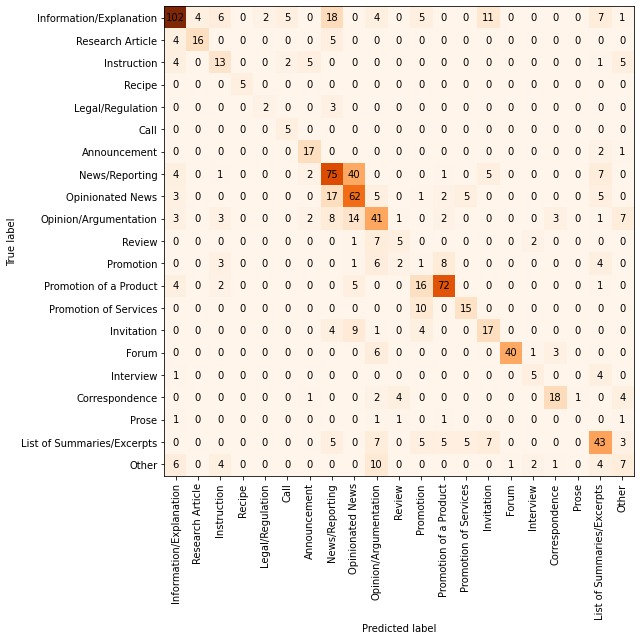

<Figure size 432x288 with 0 Axes>

In [ ]:
    cm_over_5_runs("SloBERTa")

## Size Impact

In [102]:
# Import the JSON file with the results log and open it as dataframe
with open("Size-results-log.json") as f:
    size_content = json.load(f)

jsonlike_size_content = dict()

for key in size_content[0].keys():
    jsonlike_size_content[key] = [i[key] for i in size_content]

size_results_df = pd.DataFrame(data = jsonlike_size_content)

size_results_df.head()

,Run,microF1,macroF1,y_true,y_pred,run,model
0,XMLRobertaLarge_run_1,0.619289,0.600262,"[News/Reporting, Opinionated News, Invitation,...","[Opinionated News, News/Reporting, Invitation,...",1,XMLRobertaLarge
1,XMLRobertaLarge_run_2,0.593909,0.589274,"[News/Reporting, Opinionated News, Invitation,...","[Opinionated News, List of Summaries/Excerpts,...",2,XMLRobertaLarge
2,XMLRobertaLarge_run_3,0.548223,0.540327,"[News/Reporting, Opinionated News, Invitation,...","[Opinionated News, List of Summaries/Excerpts,...",3,XMLRobertaLarge
3,XMLRobertaLarge_run_4,0.578680,0.506542,"[News/Reporting, Opinionated News, Invitation,...","[Opinionated News, News/Reporting, Invitation,...",4,XMLRobertaLarge
4,XMLRobertaLarge_run_5,0.553299,0.546443,"[News/Reporting, Opinionated News, Invitation,...","[Opinionated News, News/Reporting, Invitation,...",5,XMLRobertaLarge


In [103]:
size_results_df.shape

(10, 7)

In [104]:
size_results_df.model.unique()

array(['XMLRobertaLarge', 'XMLRobertaBase'], dtype=object)

In [105]:
size_results_list = []

print("""
Model & Micro F1 & Macro F1\\""")

for i in size_results_df.model.unique().tolist():
        size_results_list.append(calculate_mean_std(i,size_results_df))


Model & Micro F1 & Macro F1\
XMLRobertaLarge, micro F1: [0.61928934 0.59390863 0.54822335 0.5786802  0.55329949], macro F1: [0.60026198 0.58927398 0.54032743 0.50654182 0.54644265]
XMLRobertaLarge & 0.579 $\pm$ 0.03 & 0.557 $\pm$ 0.03\
XMLRobertaBase, micro F1: [0.47715736 0.51269036 0.50253807 0.49746193 0.44162437], macro F1: [0.40976979 0.43758628 0.45818993 0.44774551 0.39303668]
XMLRobertaBase & 0.486 $\pm$ 0.03 & 0.429 $\pm$ 0.02\


In [106]:
# Calculating statistical significance

c1 = size_results_df.model == "XMLRobertaLarge"
c2 = size_results_df.model == 'XMLRobertaBase'

    #Candidate:
highermi = size_results_df.loc[c1, "microF1"][0:5]
higherma = size_results_df.loc[c1, "macroF1"][0:5]
    #Alternative
lowermi = size_results_df.loc[c2, "microF1"][0:5]
lowerma = size_results_df.loc[c2, "macroF1"][0:5]

print("Shape of the micro and macro scores for model 1: ",highermi.shape,higherma.shape)
print("Shape of the micro and macro scores for model 2: ", lowermi.shape, lowerma.shape)

p_mi = stats.mannwhitneyu(highermi,lowermi, alternative='greater')[1]
p_ma = stats.mannwhitneyu(higherma,lowerma, alternative='greater')[1]

print(f"MannWhithey p value for micro F1: {stats.mannwhitneyu(highermi,lowermi, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")

if p_mi < 0.05:
    print("Micros are statistically significantly different.")
else:
    print("There is no statistical significance in micro F1 results.")

print(f"MannWhithey p value for macro F1: {stats.mannwhitneyu(higherma,lowerma, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")

if p_ma < 0.05:
        print("Macros are statistically significantly different.")
else:
        print("There is no statistical significance in macro F1 results.")

    #print(f"Student p value: {stats.ttest_ind(higher,lower)[1]:0.3}", "\t\t(null hypothesis: samples have identical average, equal variance is assumed but not necessary)")

print(f"Micro F1: Higher average: {np.mean(highermi):0.4}, lower average: {np.mean(lowermi):0.4}")

print(f"Macro F1: Higher average: {np.mean(higherma):0.4}, lower average: {np.mean(lowerma):0.4}")

Shape of the micro and macro scores for model 1:  (5,) (5,)
Shape of the micro and macro scores for model 2:  (5,) (5,)
MannWhithey p value for micro F1: 0.00609 		(alternative hypothesis: first is greater than the second)
Micros are statistically significantly different.
MannWhithey p value for macro F1: 0.00609 		(alternative hypothesis: first is greater than the second)
Macros are statistically significantly different.
Micro F1: Higher average: 0.5787, lower average: 0.4863
Macro F1: Higher average: 0.5566, lower average: 0.4293


In [109]:
# Calculating statistical significance of XMLRoberta Large and SloBERTa

c1 = size_results_df.model == "XMLRobertaLarge"
c2 = results_df.model == 'SloBERTa'

    #Candidate:
highermi = size_results_df.loc[c1, "microF1"][0:5]
higherma = size_results_df.loc[c1, "macroF1"][0:5]
    #Alternative
lowermi = results_df.loc[c2, "microF1"][0:5]
lowerma = results_df.loc[c2, "macroF1"][0:5]

print("Shape of the micro and macro scores for model 1: ",highermi.shape,higherma.shape)
print("Shape of the micro and macro scores for model 2: ", lowermi.shape, lowerma.shape)

p_mi = stats.mannwhitneyu(highermi,lowermi, alternative='greater')[1]
p_ma = stats.mannwhitneyu(higherma,lowerma, alternative='greater')[1]

print(f"MannWhithey p value for micro F1: {stats.mannwhitneyu(highermi,lowermi, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")

if p_mi < 0.05:
    print("Micros are statistically significantly different.")
else:
    print("There is no statistical significance in micro F1 results.")

print(f"MannWhithey p value for macro F1: {stats.mannwhitneyu(higherma,lowerma, alternative='greater')[1]:0.3}", "\t\t(alternative hypothesis: first is greater than the second)")

if p_ma < 0.05:
        print("Macros are statistically significantly different.")
else:
        print("There is no statistical significance in macro F1 results.")

    #print(f"Student p value: {stats.ttest_ind(higher,lower)[1]:0.3}", "\t\t(null hypothesis: samples have identical average, equal variance is assumed but not necessary)")

print(f"Micro F1: Higher average: {np.mean(highermi):0.4}, lower average: {np.mean(lowermi):0.4}")

print(f"Macro F1: Higher average: {np.mean(higherma):0.4}, lower average: {np.mean(lowerma):0.4}")

Shape of the micro and macro scores for model 1:  (5,) (5,)
Shape of the micro and macro scores for model 2:  (5,) (5,)
MannWhithey p value for micro F1: 0.376 		(alternative hypothesis: first is greater than the second)
There is no statistical significance in micro F1 results.
MannWhithey p value for macro F1: 0.148 		(alternative hypothesis: first is greater than the second)
There is no statistical significance in macro F1 results.
Micro F1: Higher average: 0.5787, lower average: 0.5695
Macro F1: Higher average: 0.5566, lower average: 0.5281


In [ ]:
size_results_list

[{'Model': 'XMLRobertaLarge',
  'Micro F1': '0.579',
  'Micro STD': '0.026',
  'Macro F1': '0.557',
  'Macro STD': '0.034'},
 {'Model': 'XMLRobertaBase',
  'Micro F1': '0.486',
  'Micro STD': '0.025',
  'Macro F1': '0.429',
  'Macro STD': '0.024'}]

### Scatterplot for micro and macro F1

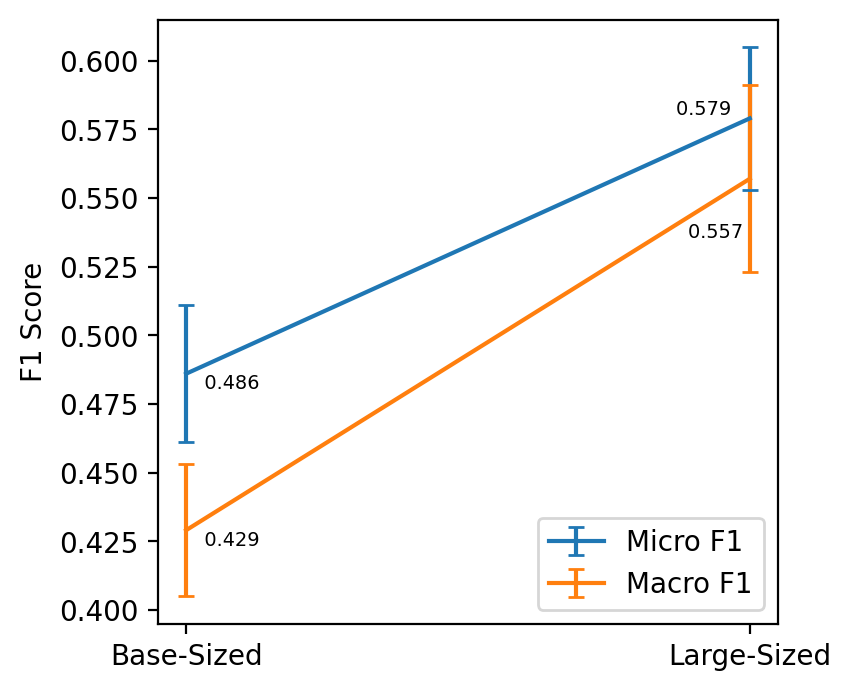

In [113]:
micro_means = [0.486,0.579]
macro_means = [0.429,0.557]
micro_stds = [0.025,0.026]
macro_stds = [0.024,0.034]

fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.errorbar(["Base-Sized", "Large-Sized"], micro_means, yerr=micro_stds, label="Micro F1", capsize=3)
ax.errorbar(["Base-Sized", "Large-Sized"], macro_means, yerr=macro_stds, label="Macro F1", capsize=3)
ax.annotate(f'   {micro_means[0]}', ("Base-Sized",micro_means[0]), ha='left', va='top', fontsize='x-small')
ax.annotate(f'   {macro_means[0]}', ("Base-Sized",macro_means[0]), ha='left', va='top', fontsize='x-small')
ax.annotate(f'\n\n{micro_means[1]}   ', ("Large-Sized",micro_means[1]), ha='right', va='bottom', fontsize='x-small')
ax.annotate(f'\n\n{macro_means[1]} ', ("Large-Sized",macro_means[1]), ha='right', va='top', fontsize='x-small')
ax.legend(loc="lower right")
ax.set_ylabel('F1 Score')
#ax.set_xlabel("Impact of the Model Size")
plt.savefig("C:/Users/kuzma/Google Drive/GitHub/task5_webgenres/plots/size_scatterplot.png")
plt.show()
